<a href="https://colab.research.google.com/github/Samuel-Njoroge/Exploratory_Data_Analysis_on_Terrorism_data/blob/main/Exploratory_Data_Analysis_on_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLAROTARY DATA ANALYSIS.**

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**EXPLORATORY DATA ANALYSIS ON TERRORISM.**

We try to find out the hot zones of terrorism.

 Steps:
 1. Data Understanding
 2. Data Cleaning
 3. Data Visualization.
 4. Conclusion.

In [2]:
#Mounting drive to acess the storage of our terrorim dataset.
from google.colab import  drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Importing libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
#Loading dataset
terrorism_data = pd.read_csv('/content/drive/MyDrive/LGMVIP/Exploratory_Data_Analysis_on_Terrorism/globalterrorismdb_0718dist.csv' , encoding = 'ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#The top 5 rows of the dataset.
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#Concise summary of the dataset.
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
#Number of rows and columns.
terrorism_data.shape

(181691, 135)

In [8]:
#Summary Statistics of the dataset.
terrorism_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Cleaning the Dataset.**

In [9]:
#A smaller copy of the dataset .
terrorism_data_copy = terrorism_data[['iyear' , 'imonth' ,'iday', 'country_txt' , 'region_txt' , 'provstate' , 'city' , 'latitude' , 'longitude' , 'location' , 
                                      'summary' , 'attacktype1_txt' , 'targtype1_txt' , 'gname',
                                      'motive' ,'weaptype1_txt' , 'nkill' , 'nwound' , 'addnotes']]

#Top 5 rows of the copy dataset.
terrorism_data_copy.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


**Renaming the columns**

For a clear description we rename the columns appropriately. 

In [10]:
#Renaming the columns.
columns = ['Year','Month','Day' ,'Country', 'Region' , 'Province/State' , 'City' , 'Latitude' , 'Longitude' , 'Location', 'Summary' ,'Attack Type',
           'Target Type' , 'Group Name' ,'Motive' , 'Weapon Type' , 'Killed' , 'Wounded' , 'Add Notes']
terrorism_data_copy.columns = columns
terrorism_data_copy.head() 

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
#Concise summary of the new dataset.
terrorism_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [12]:
#Checking for the null/empty values.
terrorism_data_copy.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

**Oservation.**

The columns Province/State , City , Latitude , longitude ,Location , Summary , Motive , Killed , Wounded , Add Notes have some Empty values.

In [13]:
#Fill the Killed and Wounded Columns with 0.
terrorism_data_copy['Killed'] = terrorism_data_copy['Killed'].fillna(0)
terrorism_data_copy['Wounded'] = terrorism_data_copy['Wounded'].fillna(0)
terrorism_data_copy['Casualty'] = terrorism_data_copy['Killed'] + terrorism_data_copy['Wounded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [14]:
#Summary Statistics
terrorism_data_copy.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**Obserations**

1. The data Consists of terrorist activities from the year 1970 - 2017.
2. The Maximum number of people killed in an event  were 8191.
3. The Maximum number of total casualties in an event were 9574.

**Data Visualization.**

**1. ATTACKS BASED ON YEARS.**
1. Number of Attacks in each year.

In [15]:
#The number of attacks in each year.
attacks_per_year = terrorism_data_copy['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns ={'index':'Year' ,'Year':'Attacks'}).set_index('Year')
attacks_per_year.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


**A bar graph of  Attacks_Per_Year vs Years.**

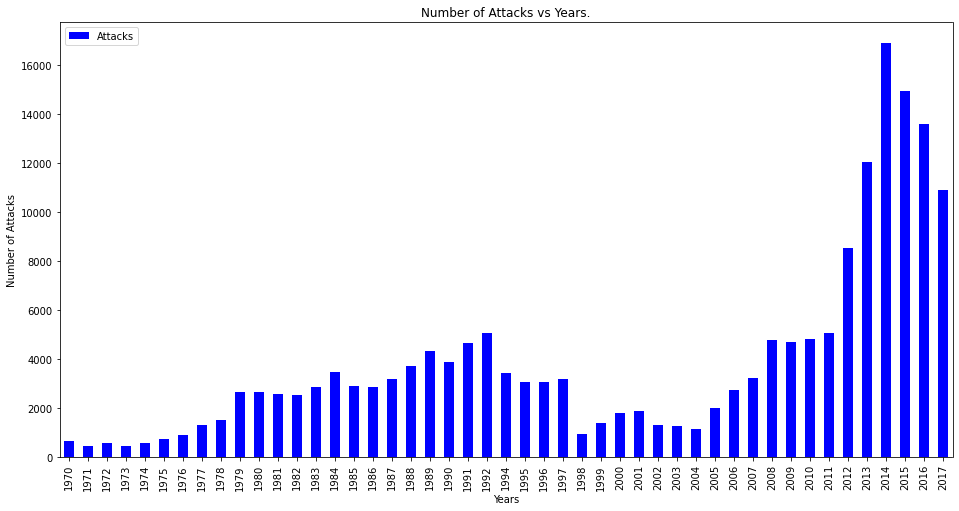

In [61]:
attacks_per_year.plot(kind = 'bar' , figsize =(16,8) , color= 'b')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks vs Years.')
plt.show()

**Observation.**

1. The number of attacks were highest in 2014. (1600)
2. The number of attacks were lowest in 1971.

**Total Casualties**
Total number of people wounded and killed.



In [17]:
#Total Casualties in each year.
total_casualties = terrorism_data_copy[['Year' , 'Casualty']].groupby('Year').sum()
total_casualties.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


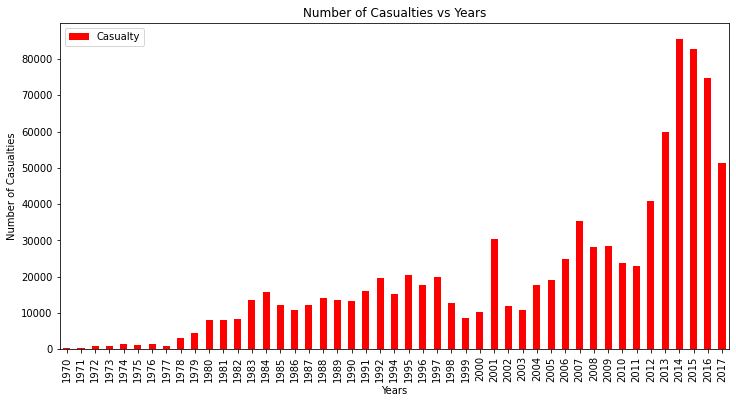

In [18]:
total_casualties.plot(kind = 'bar' , color = 'r' , figsize = (12,6))
plt.title('Number of Casualties vs Years')
plt.xlabel('Years')
plt.ylabel('Number of Casualties')
plt.show()

**Number of people killed in each year.**


In [19]:
kills_per_year = terrorism_data_copy[['Year','Killed']].groupby('Year').sum()
kills_per_year.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


**Wounded in each Region**


In [20]:
number_of_wounded = terrorism_data_copy[['Year' ,'Wounded']].groupby('Year').sum()
number_of_wounded.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


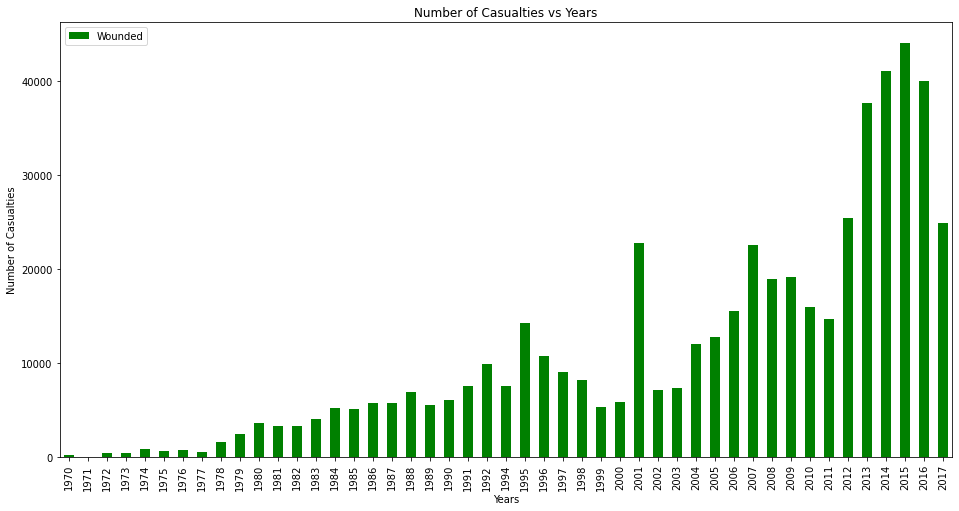

In [62]:
number_of_wounded.plot(kind='bar' , color='g' , figsize=(16,8))
plt.title('Number of Casualties vs Years')
plt.xlabel('Years')
plt.ylabel('Number of Casualties')
plt.show()

**2. ATTACKS BASED ON REGIONS.**

In [22]:
region = pd.crosstab(terrorism_data_copy.Year , terrorism_data_copy.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


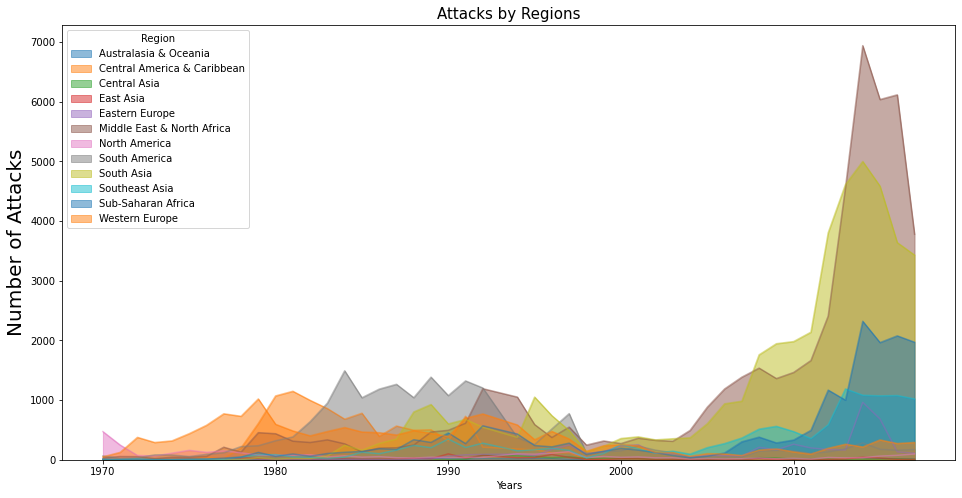

In [23]:
region.plot(kind='area' , stacked = False , alpha = 0.5 , figsize =(16,8))
plt.title('Attacks by Regions' , fontsize =15)
plt.xlabel('Years')
plt.ylabel('Number of Attacks' , fontsize = 20)
plt.show()

**Total Terrorist Attacks in each Region**

In [24]:
region_attacks = region.transpose()
region_attacks['Total'] = region_attacks.sum(axis=1)
region_attacks = region_attacks['Total'].sort_values(ascending = False)
region_attacks

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

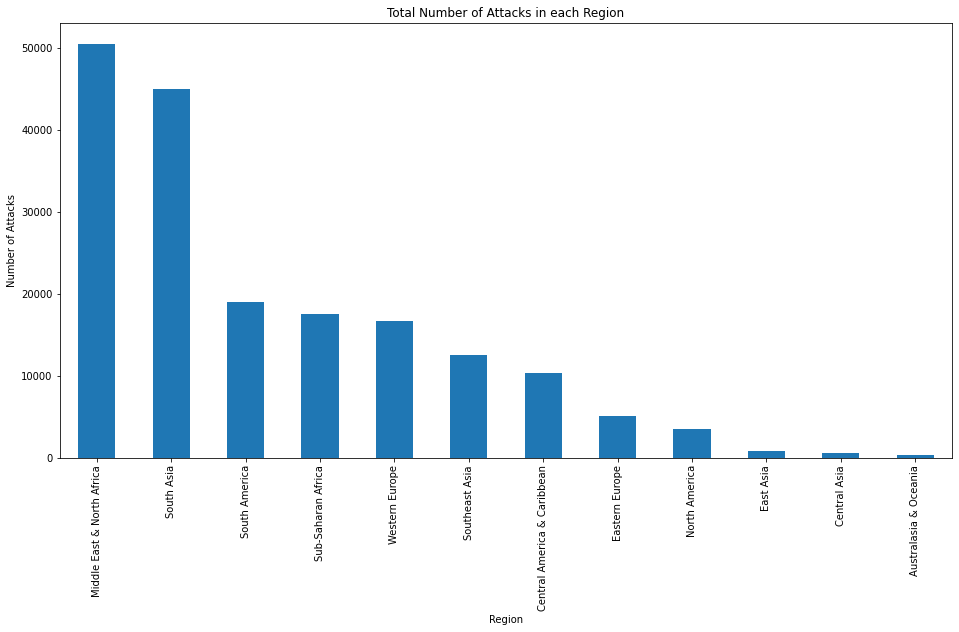

In [58]:
region_attacks.plot(kind='bar'  ,figsize=(16,8))
plt.title('Total Number of Attacks in each Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.show()

**Observation.**
1. The number of highest attacks is in Middle East and North Africa.
2. The number of lowest attacks is in Australasia and Oceanica

**Total Casualties in each Region.**

In [26]:
region_casualties = terrorism_data_copy[['Region' ,'Casualty']].groupby('Region').sum().sort_values(by='Casualty' , ascending = False)
region_casualties

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


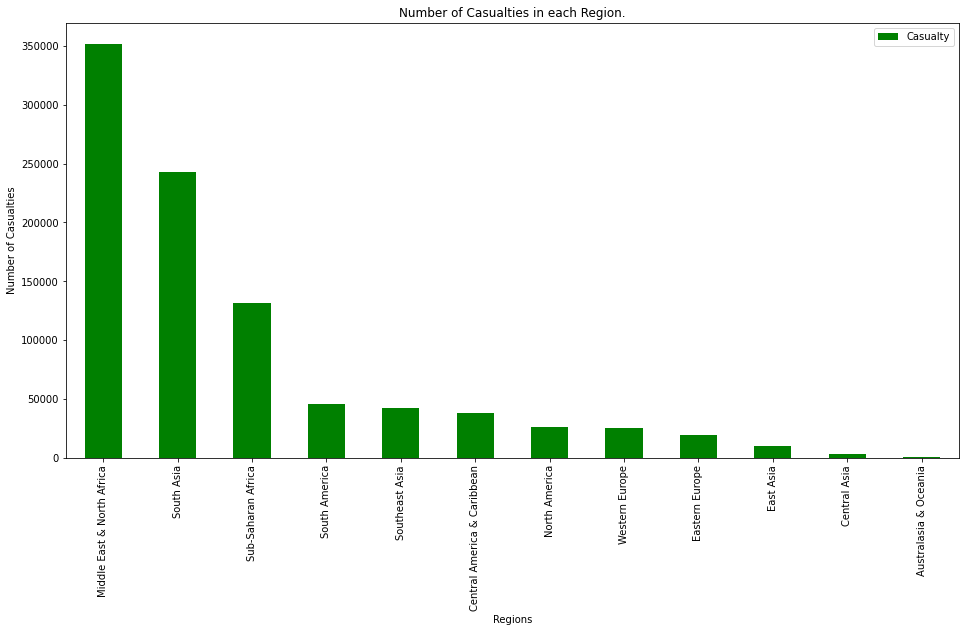

In [59]:
region_casualties.plot(kind='bar' , color='g' , figsize =(16,8))
plt.title("Number of Casualties in each Region.")
plt.xlabel('Regions')
plt.ylabel('Number of Casualties')
plt.show()

**Number of People Killed in each Region.**

In [28]:
killed_in_region= terrorism_data_copy[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed' , ascending = False)
killed_in_region

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


**3. ATTACKS BASED ON COUNTRIES.**

**Number of Attacks in each Country.**

In [29]:
country_attacks = terrorism_data_copy['Country'].value_counts().head()
country_attacks

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

**Observations.**

1. Iraq has the highest number of attacks.

2. Colombia has the least number of attacks.

Text(0.5, 1.0, 'Nnumber of Attacks vs Countries.')

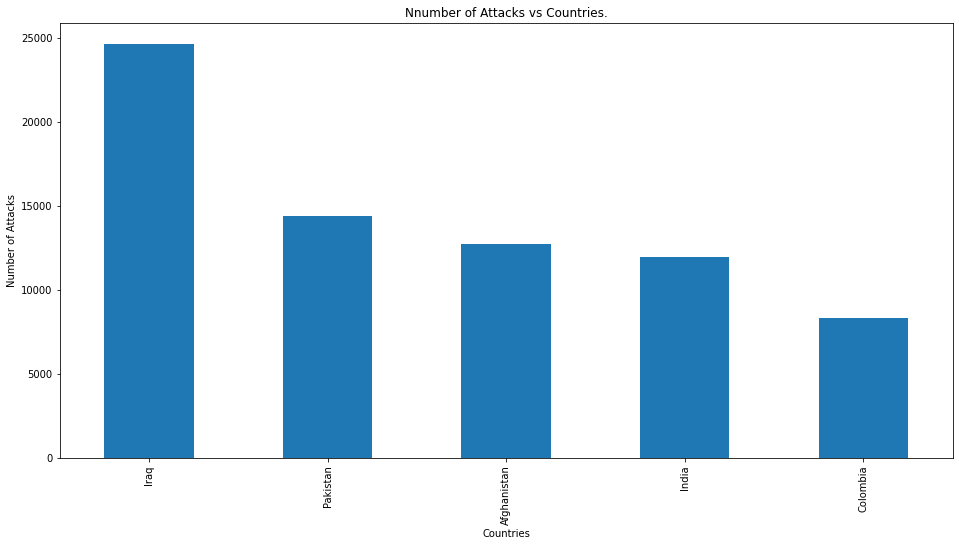

In [60]:
country_attacks.plot(kind='bar' ,figsize =(16,8))
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.title("Nnumber of Attacks vs Countries.")

**Number of People Killed in each Country.**

In [31]:
killed_in_country = terrorism_data_copy[['Country' , 'Killed']].groupby('Country').sum().sort_values(by='Killed' , ascending = False)
killed_in_country.head()

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


**Number of people Wounded in each Country.**

In [32]:
country_wounded = terrorism_data_copy[['Country' , 'Wounded']].groupby('Country').sum().sort_values(by='Wounded' ,ascending = False)
country_wounded

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
...,...
Bahamas,0.0
South Vietnam,0.0
Montenegro,0.0


**4. ATTACKS BASED ON CITIES.**

1. Number of attacks in each City.

In [33]:
city_attacks = terrorism_data_copy['City'].value_counts()[1:11]
city_attacks

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

**Observation.**

*1.Baghdad had the highest number of attacks. (7589)*

*2.Athens had the least number of attacks. (1019)*

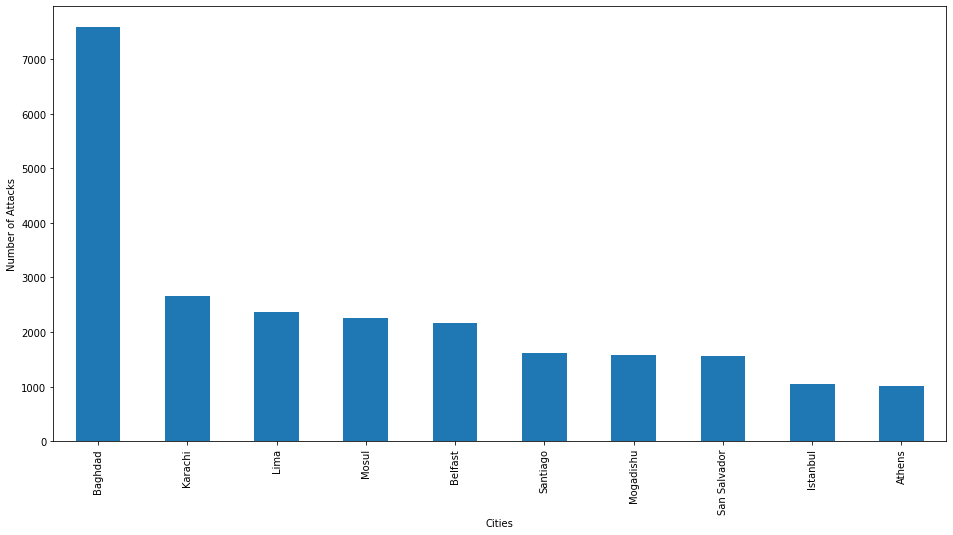

In [63]:
city_attacks.plot(kind='bar' , figsize=(16,8))
plt.xlabel("Cities")
plt.ylabel('Number of Attacks')
plt.show()

**5. ATTACKS BASED ON TERRORIST GROUPS.**
1. The top 10 number of Attacks by each Group.

In [35]:
group_attacks = terrorism_data_copy['Group Name'].value_counts()[1:10]
group_attacks

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

**Observation.**

*1. Taliban has the highest number of attacks. (7478)*
*2. Boko Haram has the least number of attacks (2418)*

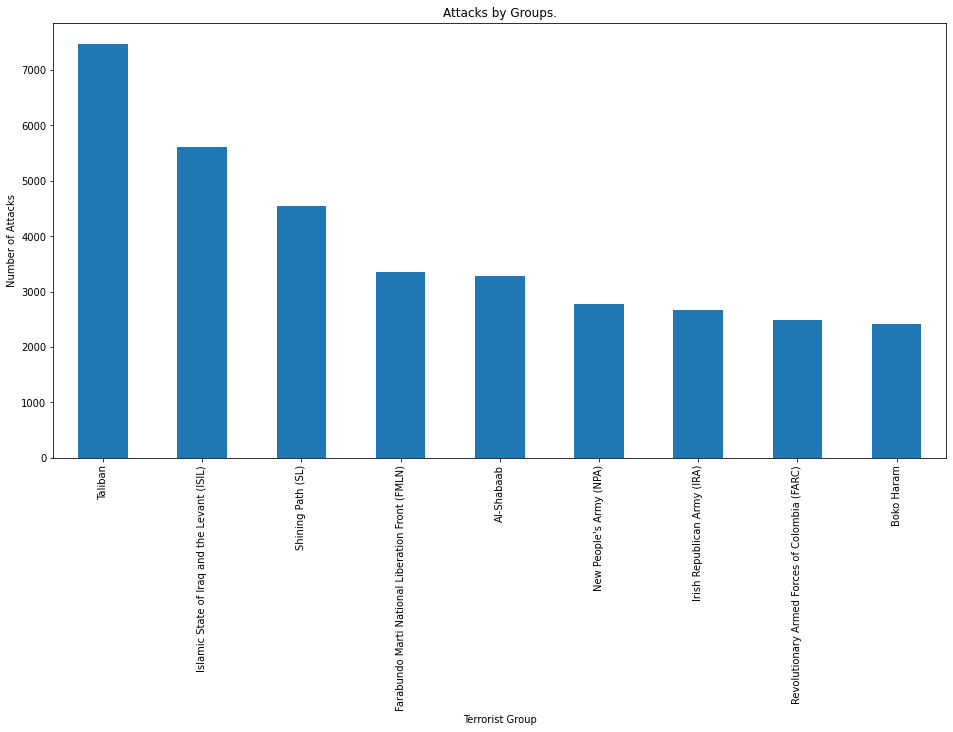

In [64]:
group_attacks.plot(kind='bar' , figsize=(16,8))
plt.title('Attacks by Groups.')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.show()

2. Total Casualties by Each  Group.

In [37]:
group_casualties = terrorism_data_copy[['Group Name' , 'Casualty']].groupby('Group Name').sum().sort_values(by='Casualty' , ascending= False)
group_casualties.head(10)

,Casualty
Group Name,
Unknown,322706.0
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0


**6. ATTACKS BASED ON TYPES OF ATTACKS.**

In [38]:
attack_type = terrorism_data_copy['Attack Type'].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

**Observation.**

*The highest number of attacks were through Bombing/Explosion (88255)*

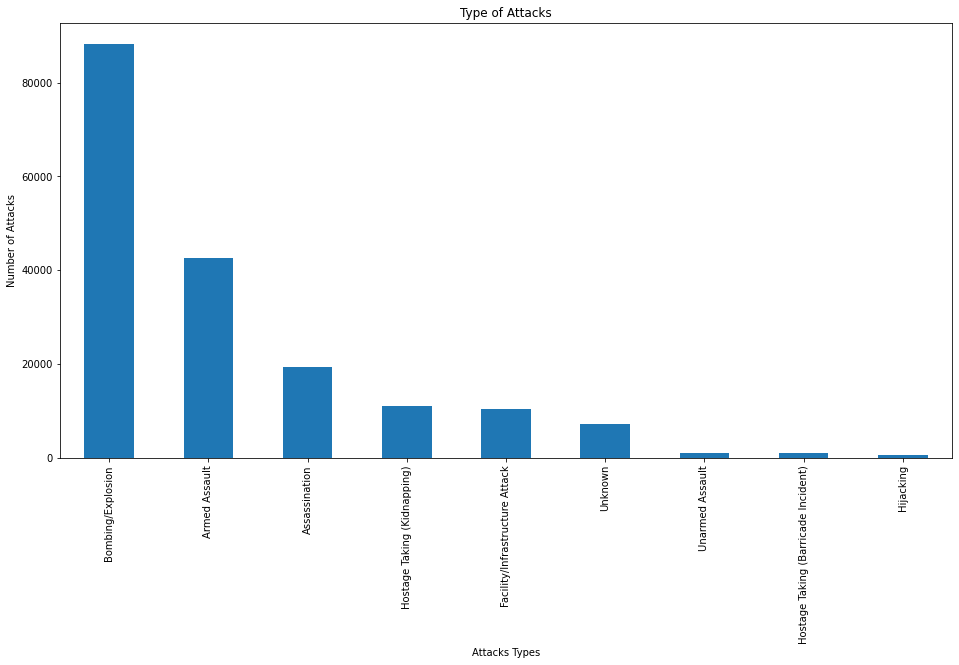

In [65]:
attack_type.plot(kind='bar' , figsize=(16,8))
plt.title("Type of Attacks")
plt.xlabel('Attacks Types')
plt.ylabel('Number of Attacks')
plt.show()

2. Total Casualties by each attack Groups.

In [40]:
attack_casualties = terrorism_data_copy[['Attack Type','Casualty']].groupby('Attack Type').sum().sort_values(by='Casualty' , ascending =False)
attack_casualties

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


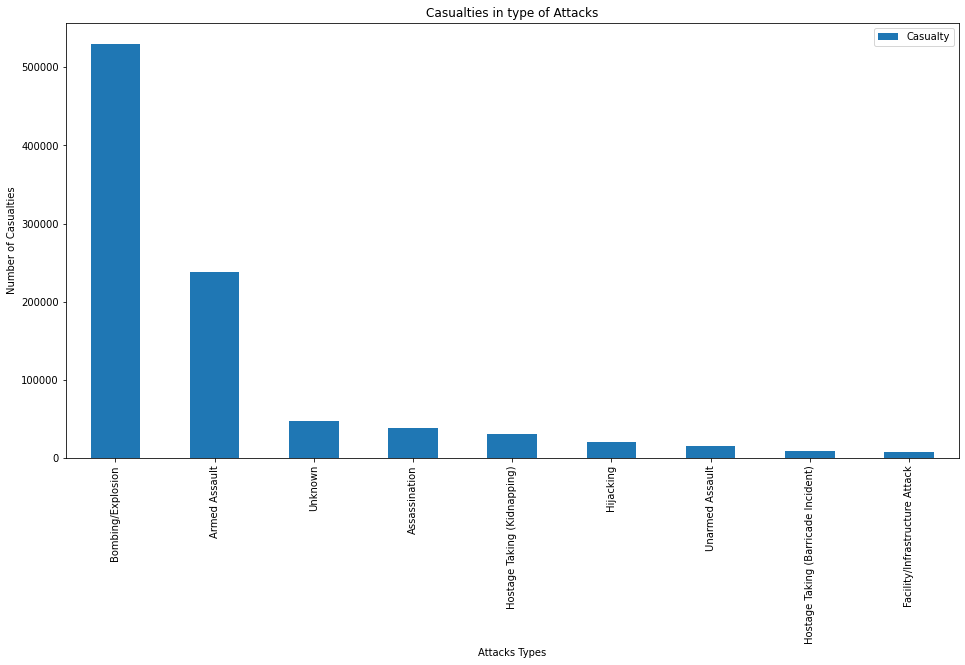

In [66]:
attack_casualties.plot(kind='bar' , figsize=(16,8))
plt.title("Casualties in type of Attacks")
plt.xlabel('Attacks Types')
plt.ylabel('Number of Casualties')
plt.show()

3. Killed by each Type.

In [42]:
killed_by_type = terrorism_data_copy[['Attack Type','Killed']].groupby('Attack Type').sum().sort_values(by='Killed' , ascending =False)
killed_by_type

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


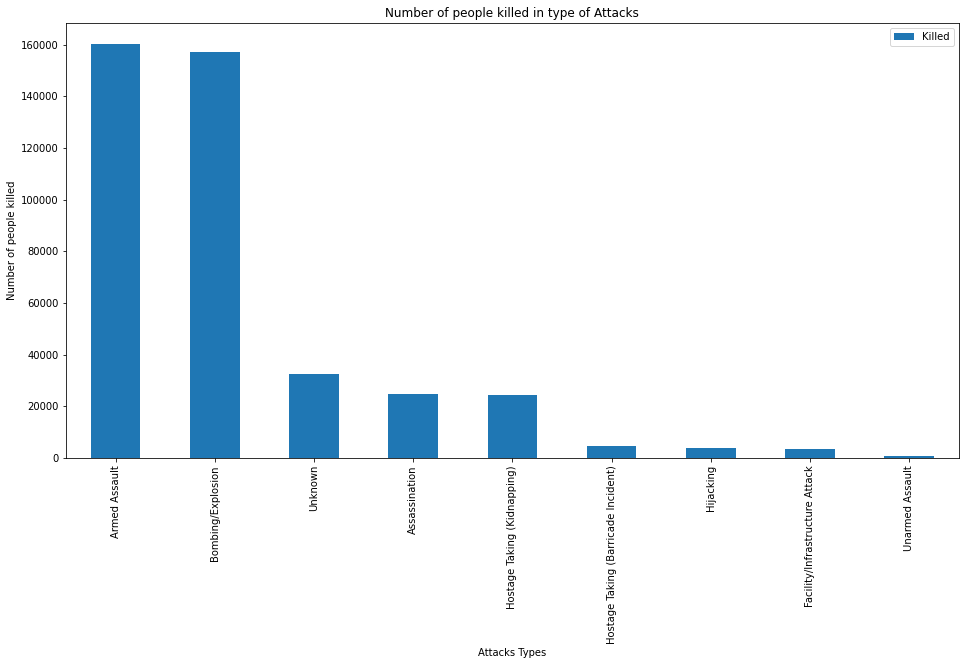

In [67]:
killed_by_type.plot(kind='bar' , figsize=(16,8))
plt.title("Number of people killed in type of Attacks")
plt.xlabel('Attacks Types')
plt.ylabel('Number of people killed')
plt.show()

**7. ATTACKS BASED ON TARGET TYPES** 

1. Number of attacks of each Target Type.

In [44]:
target_attack= terrorism_data_copy['Target Type'].value_counts()
target_attack

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

**Observation.**
1. The Private Citizens & Property are the most targeted. (43511)

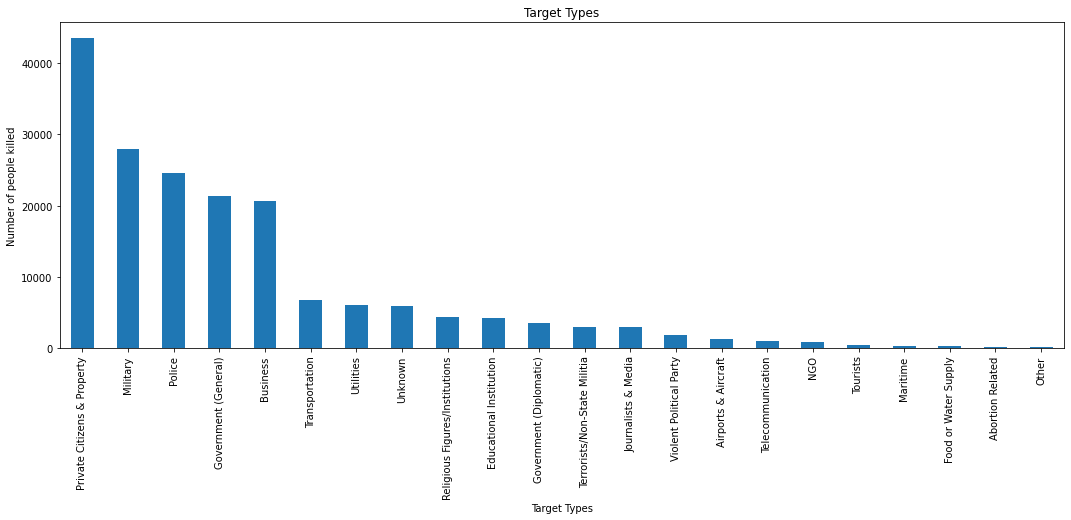

In [45]:
target_attack.plot(kind='bar' , figsize=(18,6))
plt.title("Target Types")
plt.xlabel('Target Types')
plt.ylabel('Number of people killed')
plt.show()

In [46]:
target_casualties = terrorism_data_copy[['Target Type','Casualty']].groupby('Target Type').sum().sort_values(by='Casualty' , ascending =False)
target_casualties

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


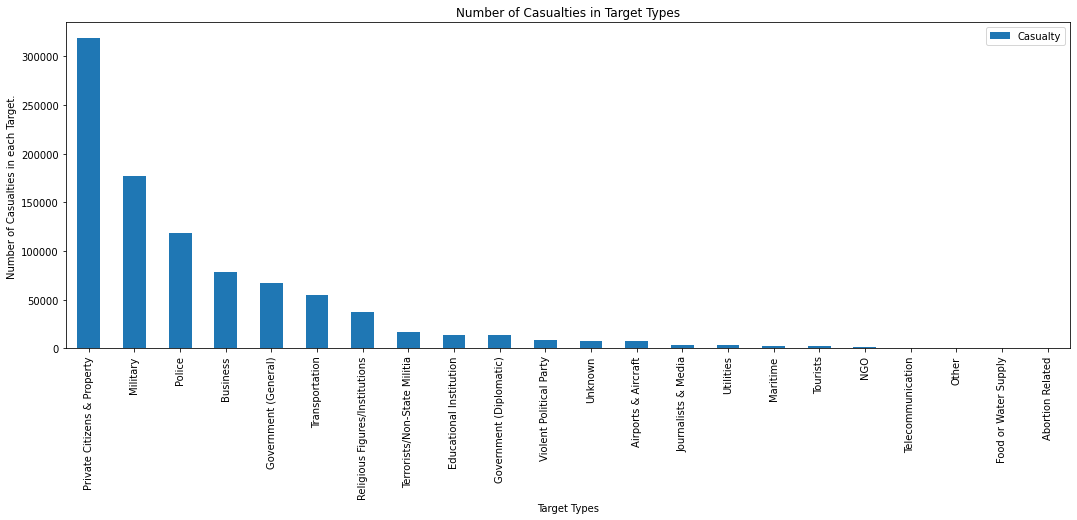

In [47]:
target_casualties.plot(kind='bar' , figsize=(18,6))
plt.title("Number of Casualties in Target Types")
plt.xlabel('Target Types')
plt.ylabel('Number of Casualties in each Target.')
plt.show()

Number of Wounded in each Target Type.

In [48]:
target_wounded = terrorism_data_copy[['Attack Type','Wounded']].groupby('Attack Type').sum().sort_values(by='Wounded' , ascending =False)
target_wounded

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


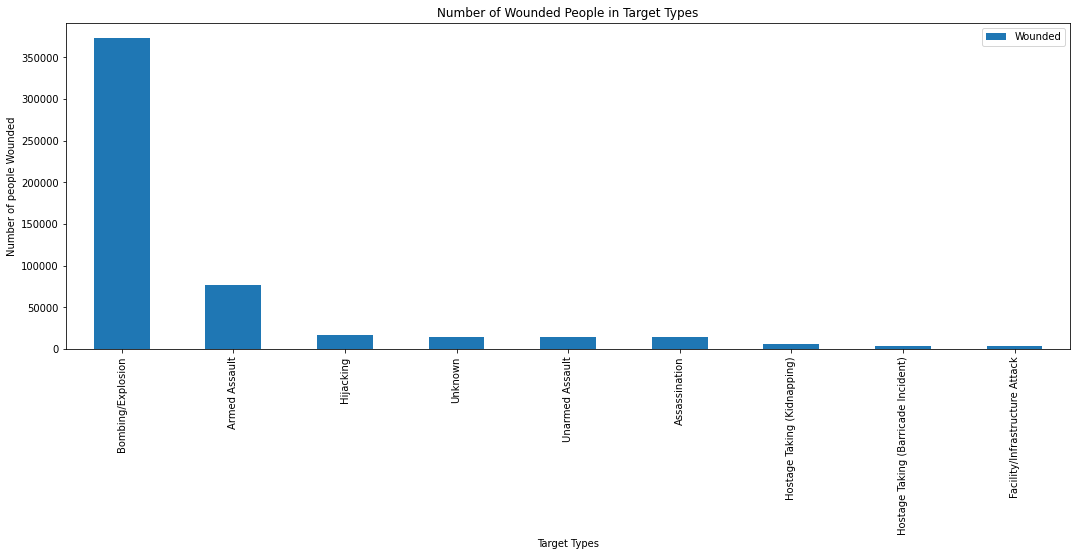

In [49]:
target_wounded.plot(kind='bar' , figsize=(18,6))
plt.title("Number of Wounded People in Target Types")
plt.xlabel('Target Types')
plt.ylabel('Number of people Wounded')
plt.show()

Number of Killed in each Target Type.

In [50]:
target_killed = terrorism_data_copy[['Attack Type','Killed']].groupby('Attack Type').sum().sort_values(by='Killed' , ascending =False)
target_killed

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


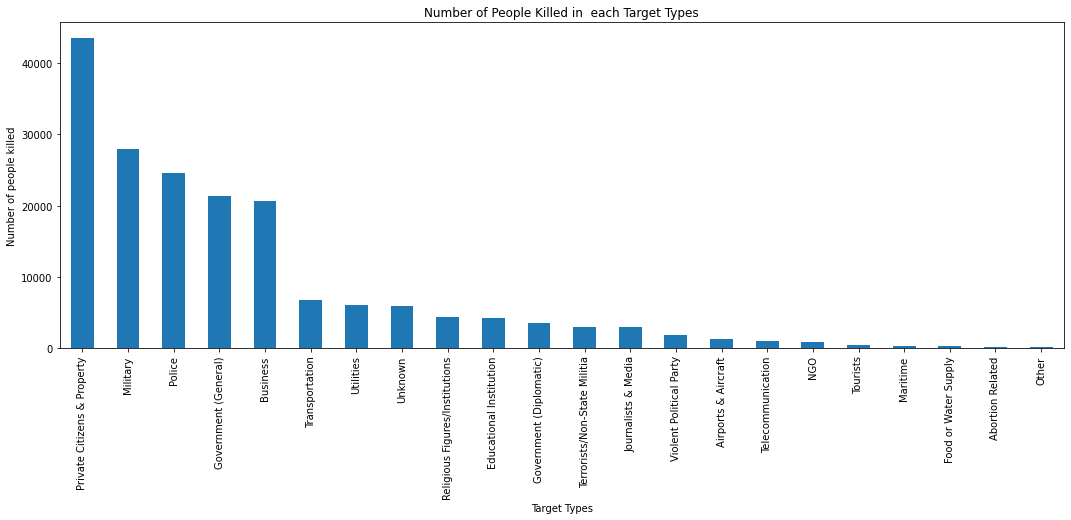

In [51]:
target_attack.plot(kind='bar' , figsize=(18,6))
plt.title("Number of People Killed in  each Target Types")
plt.xlabel('Target Types')
plt.ylabel('Number of people killed')
plt.show()

**8. ATTACKS BASED ON GROUPS AND COUNTRIES.**

1.Sorting by number of Attacks.

In [52]:
group_country_attacks = terrorism_data_copy[['Group Name' , 'Country']].value_counts().drop('Unknown')
group_country_attacks.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

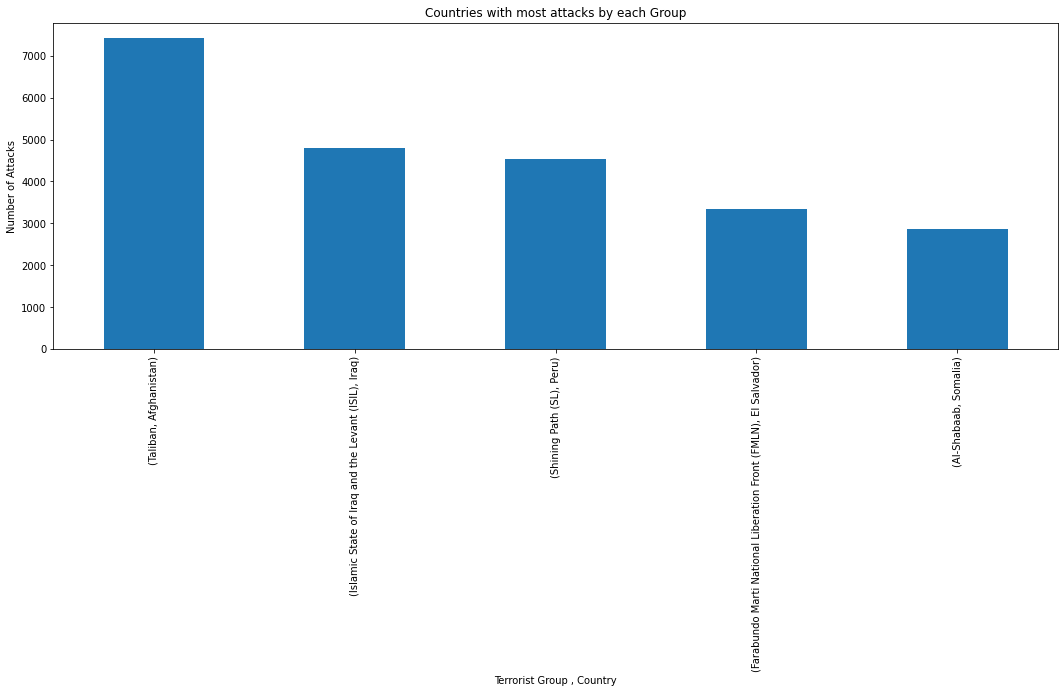

In [53]:
group_country_attacks.head().plot(kind='bar' , figsize=(18,6))
plt.title("Countries with most attacks by each Group")
plt.xlabel('Terrorist Group , Country')
plt.ylabel('Number of Attacks')
plt.show()

2.Sorting by number of Casulties.

In [54]:
group_country_casualties = terrorism_data_copy[['Group Name' , 'Country' , 'Casualty']].groupby(['Group Name' , 'Country'] , axis = 0).sum().sort_values(by='Casualty' , ascending=False)
group_country_casualties 

,,Casualty
Group Name,Country,
Unknown,Iraq,129589.0
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Unknown,Pakistan,34570.0
Boko Haram,Nigeria,24588.0
...,...,...
People's Information Group,Nicaragua,0.0
Drug-Related Terrorists,Haiti,0.0
People's Liberation Army (United States),United States,0.0


**9. ATTACKS BASED ON TOTAL NUMBER OF PEOPLE AFFECTED FROM 1970 T0 2017.**
1. Total Casualties in Terrorist Attacks(Killed + Wounded.)

In [55]:
total_casualty = terrorism_data_copy.loc[:,'Casualty'].sum()
print('Total number of Casualties in Terrorist Attacksis:',total_casualty)

Total number of Casualties in Terrorist Attacksis: 935737.0


2. Total Killed in Terrorist Attacks

In [56]:
total_killed = terrorism_data_copy.loc[:,'Killed'].sum()
print('Total number of People killed in Terrorist Attacks is: ' ,total_killed)

Total number of People killed in Terrorist Attacks is:  411868.0


3. Total number of People wounded Terrorist Attacks.

In [57]:
total_wounded = terrorism_data_copy.loc[:,'Wounded'].sum()
print('Total number of People wounded in Terrorist Attacks is: ' ,total_wounded)

Total number of People wounded in Terrorist Attacks is:  523869.0


#OVERALL OBSERVATIONS FROM THE TERRORIST ATTACKS.

1. ATTACKS BASED ON  YEARS.

 a) The number of attacks were highest in 2014. (1600)

 b) The number of attacks were lowest in 1971. 
2. ATTACKS BASED ON REGIONS

  a) Middle East & North Africa had the highest attacks - (50474)

  b) Australasia had the least number of attacks.
3. ATTACKS BASED ON COUNTRIES.

   a) Iraq has the highest number of attacks.

  b) Colombia has the least number of attacks.
4. ATTACKS BASED ON CITIES.

  a) Baghdad has the highest number of attacks. (7589)

  b) Athens has the least number of attacks. (1019)
5. ATTACKS BASED ON TERRORIST GROUPS.

   a)Taliban has the highest number of attacks. (7478)

  b) Boko Haram has the least number of attacks (2418
6. ATTACKS BASED ON TYPES OF ATTACKS.

   The highest number of attacks were through Bombing/Explosion (88255)
7. ATTACKS BASED ON TARGET TYPE.

  The Private Citizens & Property are the most targeted. (43511)
.
8. ATTACKS BASED ON  TOTAL NUMBER OF PEOPLE AFFECTED FROM 1970 T0 2017.
  
   a) Total number of Casualties in Terrorist Attacksis: 935737.0

   b) Total number of People killed in Terrorist Attacks is:  411868.0

   c) Total number of People wounded in Terrorist Attacks is:  523869.0
